In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [3]:
df=df[['date','meantemp']]

In [4]:
df

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889
...,...,...
109,2017-04-20,34.500000
110,2017-04-21,34.250000
111,2017-04-22,32.900000
112,2017-04-23,32.875000


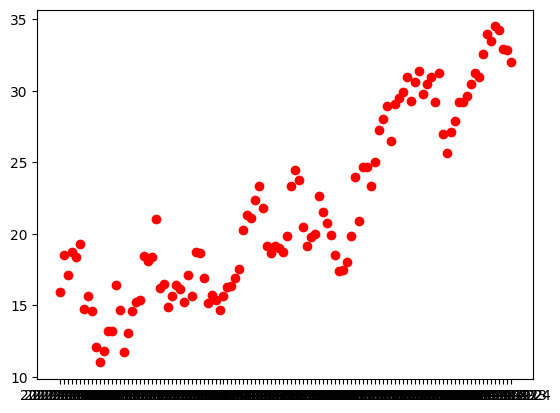

In [5]:
plt.scatter(df['date'],df['meantemp'],color='red')


In [6]:
#using ewm function from pandas
x1=df['meantemp'].ewm(alpha=0.9).mean()  #alpha=1-beta

In [7]:
x1

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

In [9]:
df['ewma']=x1
df

,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266
...,...,...,...
109,2017-04-20,34.500000,34.403401
110,2017-04-21,34.250000,34.265340
111,2017-04-22,32.900000,33.036534
112,2017-04-23,32.875000,32.891153


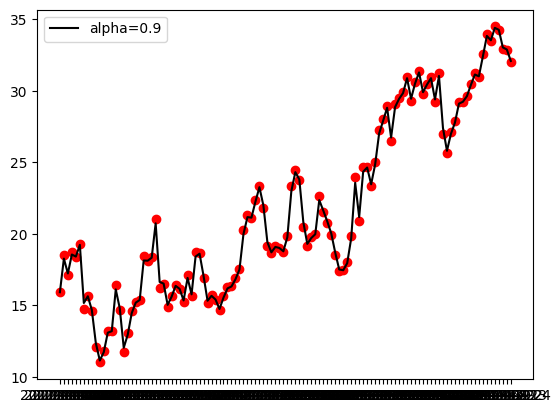

In [10]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],df['ewma'],color='black',label="alpha=0.9")
plt.legend()
plt.show()

In [11]:
x2=df['meantemp'].ewm(alpha=0.1).mean()  #alpha=0.1 i.e beta=0.9
x2

0      15.913043
1      17.274600
2      17.214272
3      17.646295
4      17.827632
         ...    
109    30.640166
110    31.001152
111    31.191039
112    31.359436
113    31.423493
Name: meantemp, Length: 114, dtype: float64

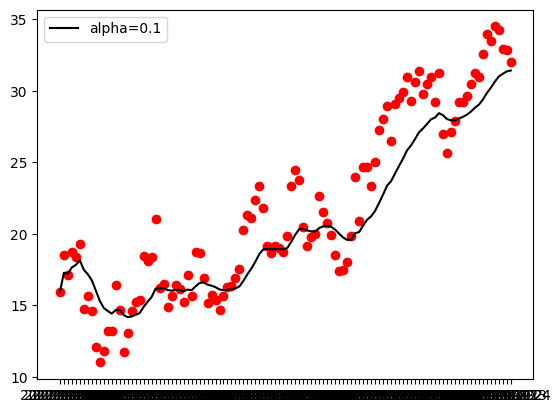

In [12]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],x2,color='black',label="alpha=0.1")
plt.legend()
plt.show()

#When the value of beta is high the weight of previous point decreases and the graph is less spikey and more stable
